<a href="https://colab.research.google.com/github/yasaswitaraja/Currency-converter/blob/main/notebooks/NSS_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving KDDTrain+.txt to KDDTrain+.txt


In [ ]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'class', 'difficulty'
]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("KDDTrain+.txt", names=column_names)
test_df = pd.read_csv("KDDTest+.txt", names=column_names)

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)
print("Training data columns:", train_df.columns)
print("Testing data columns:", test_df.columns)

print("--- Training Data ---")
print(f"Shape: {train_df.shape}")
print(train_df.head())

print("\n--- Testing Data ---")
print(f"Shape: {test_df.shape}")
print(test_df.head())

Training data shape: (125973, 43)
Testing data shape: (22544, 43)
Training data columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty'],
      dtype='object')
Testing data columns: Index(['duration', 'prot

In [ ]:
print("\n--- Training Data Info ---")
train_df.info()

print("\n--- Missing Values ---")
print(train_df.isnull().sum().sum())


--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              1

/tmp/ipython-input-1446411240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack_binary', data=train_df, palette='pastel')


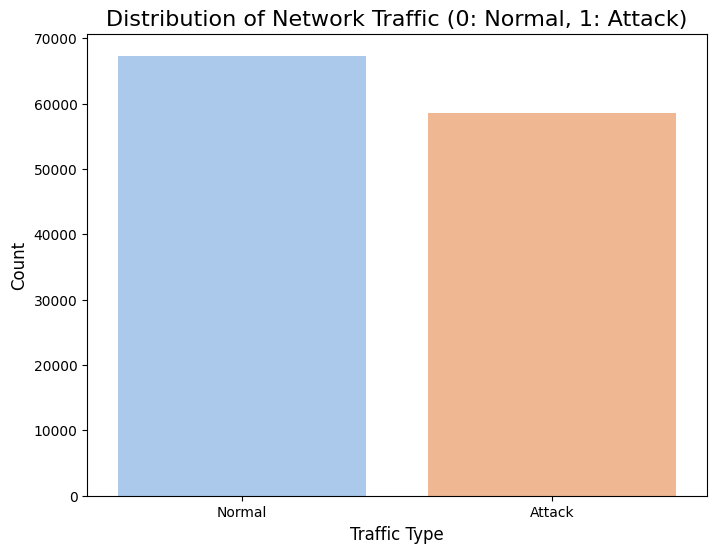

attack_binary
0    0.534583
1    0.465417
Name: proportion, dtype: float64


In [ ]:
# Create a binary classification target
train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack_binary'] = test_df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Distribution of the binary class
plt.figure(figsize=(8, 6))
sns.countplot(x='attack_binary', data=train_df, palette='pastel')
plt.title('Distribution of Network Traffic (0: Normal, 1: Attack)', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.show()

print(train_df['attack_binary'].value_counts(normalize=True))

/tmp/ipython-input-3234364765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='class', data=attack_df, order=attack_df['class'].value_counts().index, palette='viridis')


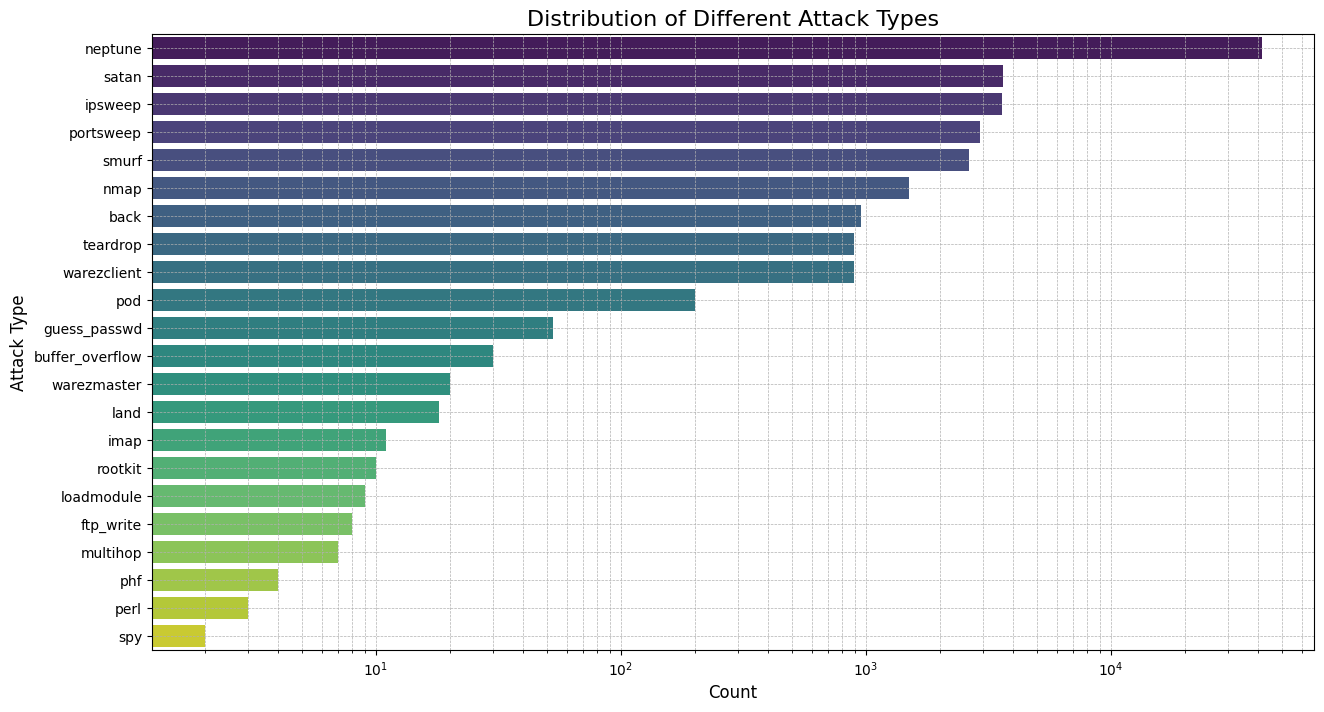

In [ ]:
# Filter for attack traffic only
attack_df = train_df[train_df['attack_binary'] == 1]

plt.figure(figsize=(15, 8))
sns.countplot(y='class', data=attack_df, order=attack_df['class'].value_counts().index, palette='viridis')
plt.title('Distribution of Different Attack Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipython-input-1351026870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='protocol_type', data=train_df, palette='magma')
/tmp/ipython-input-1351026870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='service', data=train_df, order=train_df['service'].value_counts().iloc[:10].index, palette='plasma')
/tmp/ipython-input-1351026870.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], x='flag', data=train_df, order=train_df['flag'].value_counts().index, palette='cividis')


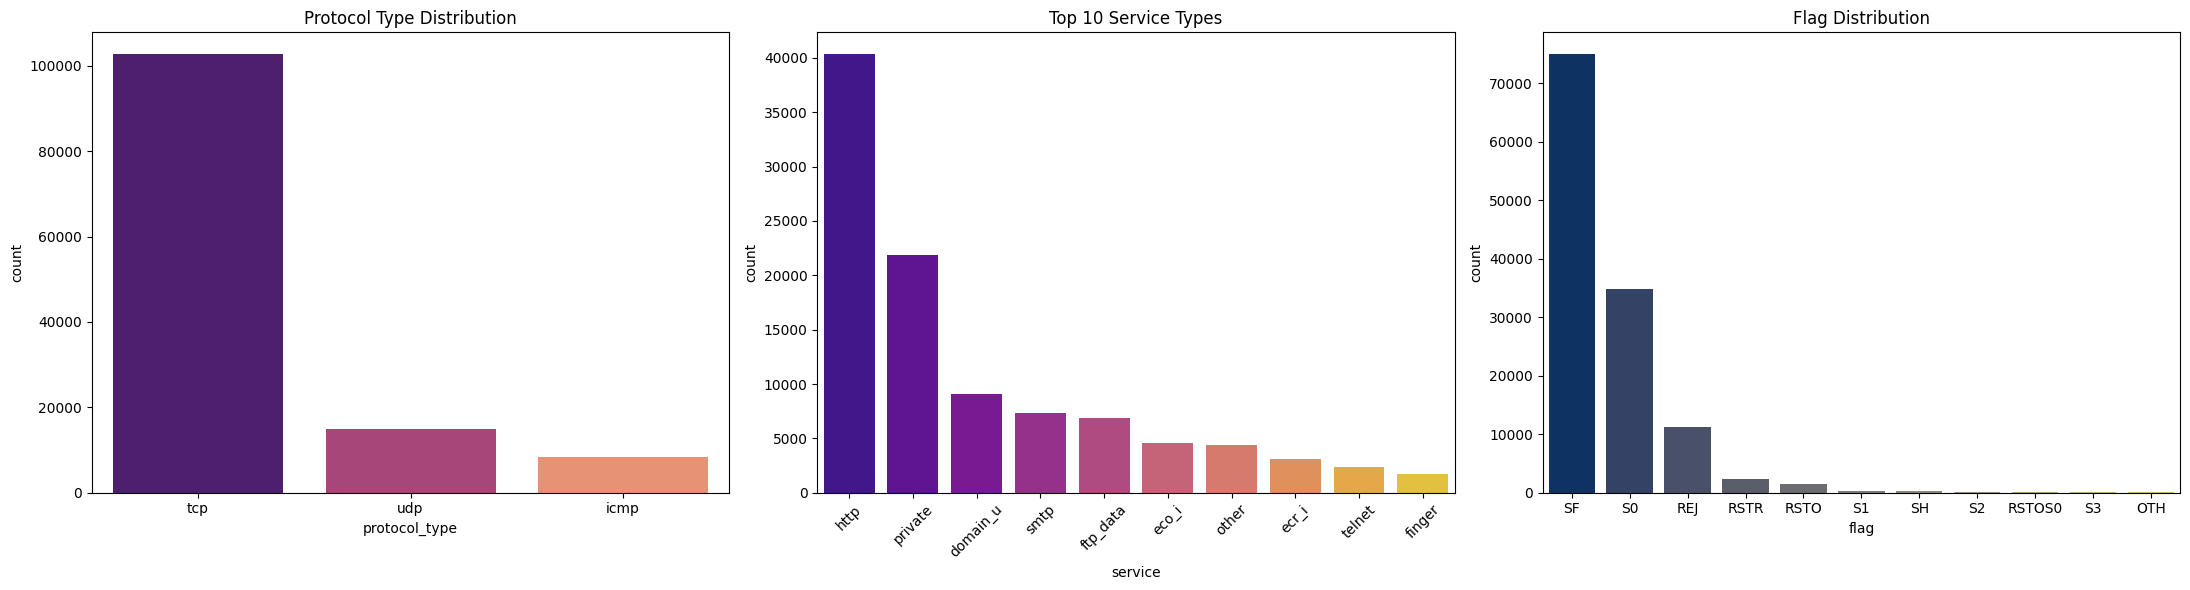

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

sns.countplot(ax=axes[0], x='protocol_type', data=train_df, palette='magma')
axes[0].set_title('Protocol Type Distribution')

sns.countplot(ax=axes[1], x='service', data=train_df, order=train_df['service'].value_counts().iloc[:10].index, palette='plasma')
axes[1].set_title('Top 10 Service Types')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], x='flag', data=train_df, order=train_df['flag'].value_counts().index, palette='cividis')
axes[2].set_title('Flag Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Separate features (X) and target (y)
X_train_raw = train_df.drop(['class', 'attack_binary'], axis=1)
y_train = train_df['attack_binary']

X_test_raw = test_df.drop(['class', 'attack_binary'], axis=1)
y_test = test_df['attack_binary']

# Identify categorical and numerical columns
categorical_cols = ['protocol_type', 'service', 'flag']
numerical_cols = X_train_raw.columns.drop(categorical_cols)

# One-Hot Encode categorical features
X_train_encoded = pd.get_dummies(X_train_raw, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_raw, columns=categorical_cols, drop_first=True)

train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols] # Ensure order is the same

print(f"Shape of training data after encoding: {X_train_encoded.shape}")
print(f"Shape of testing data after encoding: {X_test_encoded.shape}")

print("\n--- Training Data Head after One-Hot Encoding ---")
display(X_train_encoded.head())
display(X_test_encoded.head())

Shape of training data after encoding: (125973, 120)
Shape of testing data after encoding: (22544, 120)

--- Training Data Head after One-Hot Encoding ---


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify the new numerical columns (original ones)
numerical_cols_to_scale = numerical_cols

scaler = StandardScaler()

# Fit on training data and transform both train and test data
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train_encoded[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test_encoded[numerical_cols_to_scale])

print("\n--- Scaled Training Data Head ---")
print(X_train_scaled.head())


--- Scaled Training Data Head ---
   duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3 -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4 -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   

        hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0 -0.095076          -0.027023  -0.809262        -0.011664  ...     False   
1 -0.095076          -0.027023  -0.809262        -0.011664  ...     False   
2 -0.095076          -0.027023  -0.809262        -0.011664  ...     False   
3 -0.095076          -0.027023   1.235694        -0.011664  ...     False   
4 -0.095076          -0.027023   1.235694        -0.011664  ...     False   

   flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2

In [ ]:
#Feature Scaling
X_train_final = X_train_scaled.copy()
X_test_final = X_test_scaled.copy()
print("Final Train Features:", X_train_final.shape)
print("Final Train Labels:", y_train.shape)
print("Final Test Features:", X_test_final.shape)
print("Final Test Labels:", y_test.shape)

Final Train Features: (125973, 120)
Final Train Labels: (125973,)
Final Test Features: (22544, 120)
Final Test Labels: (22544,)


In [ ]:
print("Train columns == Test columns ? ",
      list(X_train_final.columns) == list(X_test_final.columns))


Train columns == Test columns ?  True


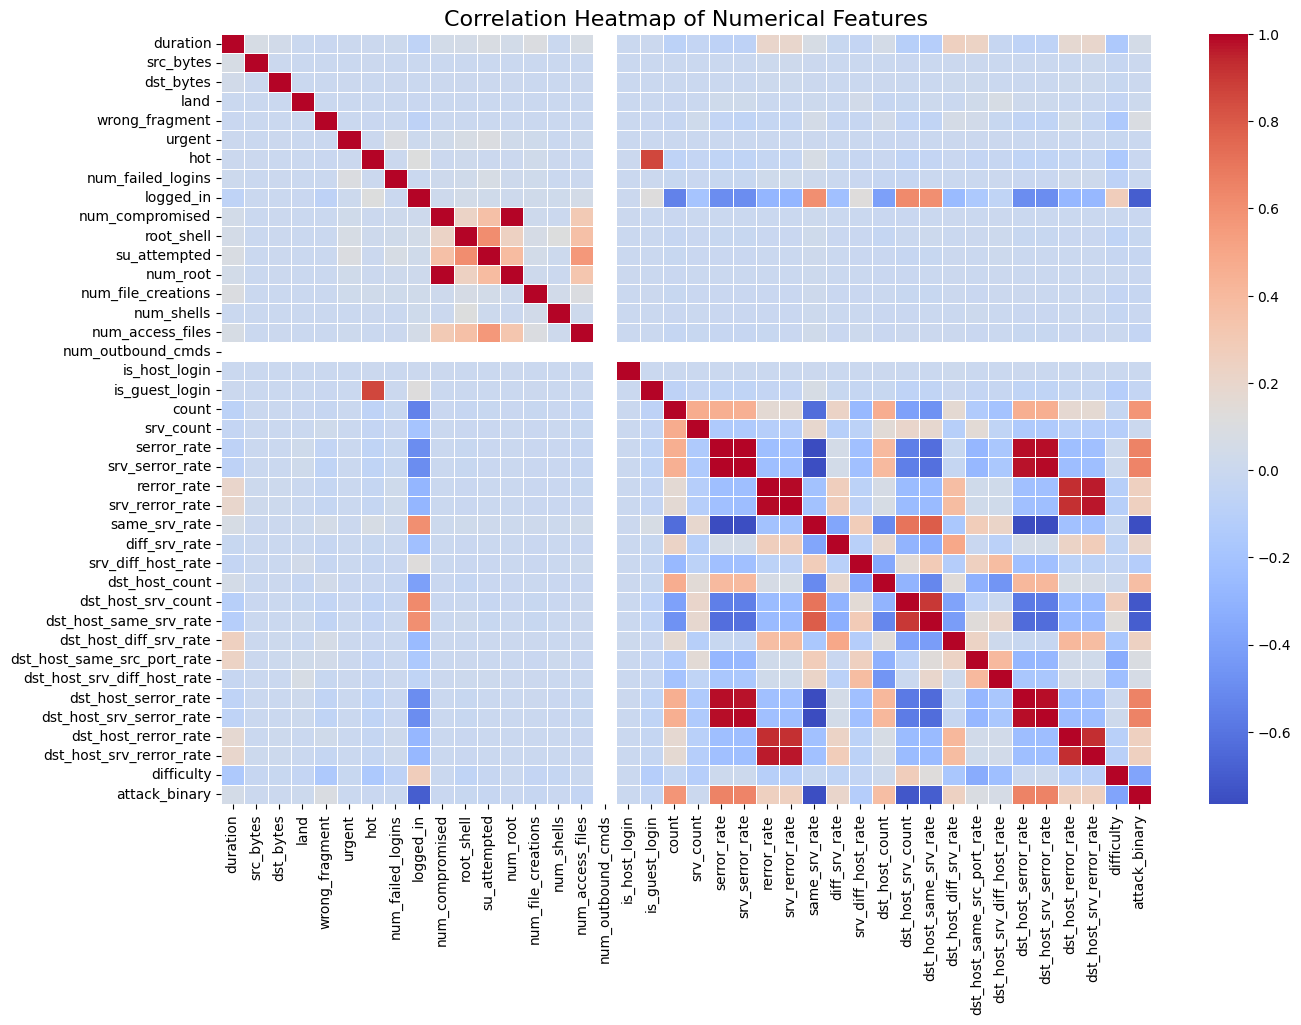

In [ ]:
#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

#correlation matrix
corr = train_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

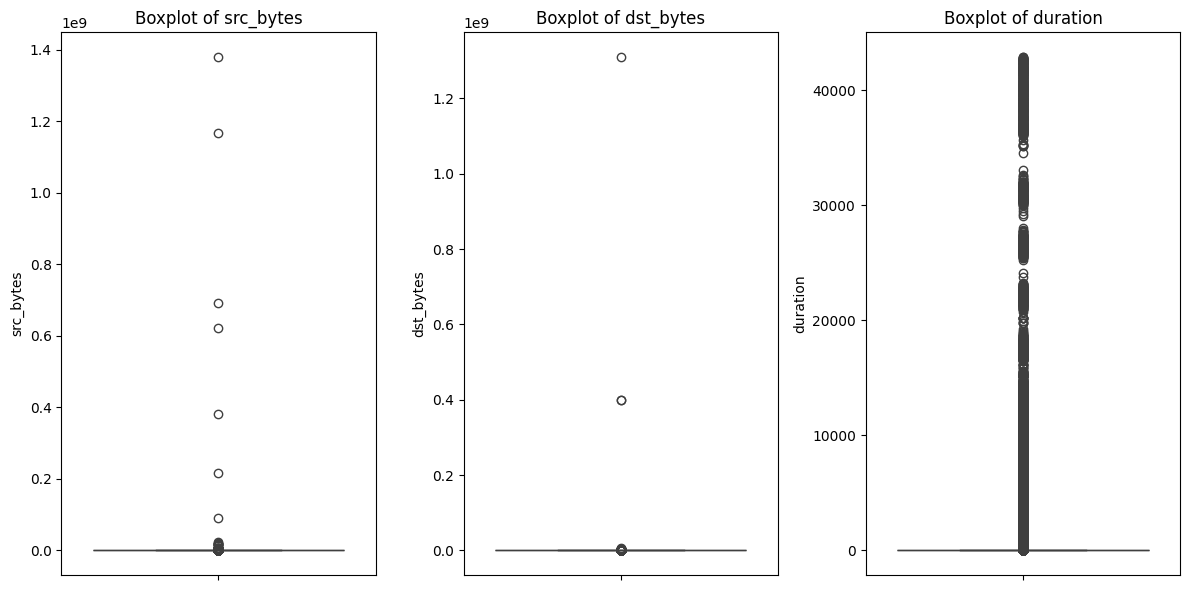

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['src_bytes', 'dst_bytes', 'duration']

# Plot boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, len(num_features), i)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#SMOTE Analysis
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

#class distribution after SMOTE
print("After SMOTE:", Counter(y_train_res))

print("Original training shape:", X_train_final.shape, y_train.shape)
print("Resampled training shape:", X_train_res.shape, y_train_res.shape)


Before SMOTE: Counter({0: 67343, 1: 58630})
After SMOTE: Counter({0: 67343, 1: 67343})
Original training shape: (125973, 120) (125973,)
Resampled training shape: (134686, 120) (134686,)


In [ ]:
#Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

print("Original feature count:", X_train_final.shape[1])
print("Reduced feature count:", X_train_pca.shape[1])
print("Explained variance ratio:", round(pca.explained_variance_ratio_.sum(), 4))


Original feature count: 120
Reduced feature count: 20
Explained variance ratio: 0.8911


Top 20 Important Features:
 dst_bytes                      0.090902
src_bytes                      0.089353
flag_SF                        0.061429
serror_rate                    0.060072
difficulty                     0.058192
dst_host_same_srv_rate         0.057975
logged_in                      0.046659
diff_srv_rate                  0.043250
dst_host_srv_serror_rate       0.042330
same_srv_rate                  0.039991
dst_host_diff_srv_rate         0.038040
count                          0.036052
dst_host_srv_count             0.034821
flag_S0                        0.028493
dst_host_same_src_port_rate    0.024291
service_http                   0.020732
dst_host_serror_rate           0.019933
dst_host_count                 0.019491
service_private                0.014753
service_ecr_i                  0.014522
dtype: float64


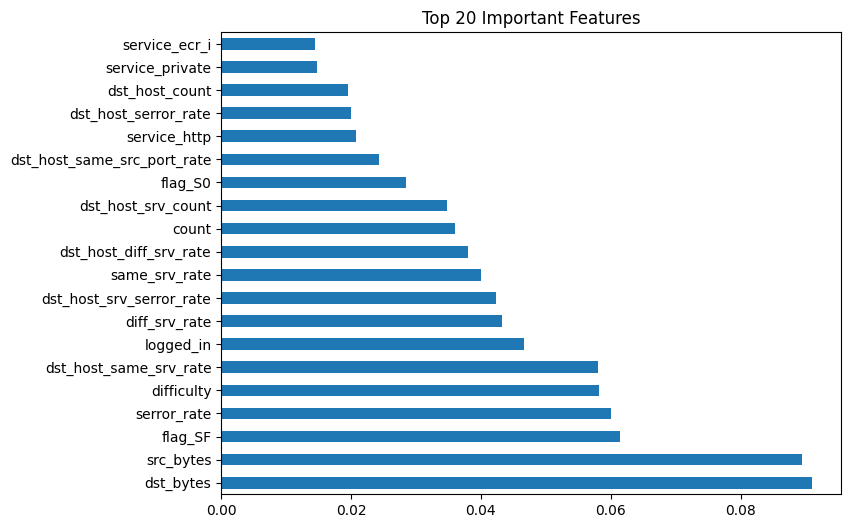

Reduced Train Shape: (125973, 20)
Reduced Test Shape: (22544, 20)


In [ ]:
#Data Reduction
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train_final.columns)

top_features = importances.sort_values(ascending=False).head(20)
print("Top 20 Important Features:\n", top_features)

# Plot
plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title("Top 20 Important Features")
plt.show()

# Reduce dataset to only top features
X_train_reduced = X_train_final[top_features.index]
X_test_reduced = X_test_final[top_features.index]

print("Reduced Train Shape:", X_train_reduced.shape)
print("Reduced Test Shape:", X_test_reduced.shape)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


models={
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Train the models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print(name + " trained.")

# Evaluate the models
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Gradient Boosting...
Gradient Boosting trained.
Evaluating Logistic Regression...
Logistic Regression Accuracy: 81.09%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal       0.72      0.92      0.81      9711
      Attack       0.92      0.73      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.83      0.81      0.81     22544

Evaluating Decision Tree...
Decision Tree Accuracy: 84.30%

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Normal       0.74      0.97      0.84      9711
      Attack       0.97      0.75      0.84     12833

    accuracy                           0.84     22544
   macro avg       0.86    

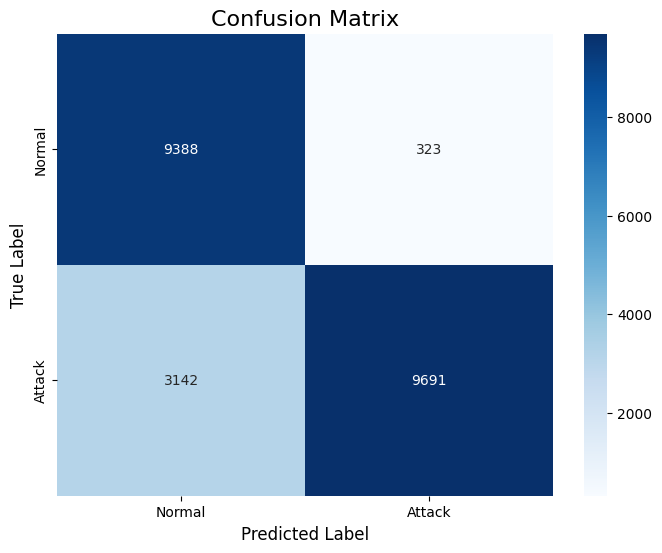

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()